<a href="https://colab.research.google.com/github/ash95sv/AMLS_II_assignment19_20-/blob/master/TaskA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sys
if 'google.colab' in sys.modules: # Colab-only Tensorflow version selector
  %tensorflow_version 2.x
import tensorflow as tf
print("Tensorflow version " + tf.__version__)

Tensorflow version 2.2.0-rc3


In [2]:
# Detect hardware, return appropriate distribution strategy
try:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()  # TPU detection
    print('Running on TPU ', tpu.cluster_spec().as_dict()['worker'])
except ValueError:
    tpu = None
    gpus = tf.config.experimental.list_logical_devices("GPU")

if tpu:
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.experimental.TPUStrategy(tpu)
elif len(gpus) > 1: # multiple GPUs in one VM
    strategy = tf.distribute.MirroredStrategy(gpus)
else: # default strategy that works on CPU and single GPU
    strategy = tf.distribute.get_strategy()

print("REPLICAS: ", strategy.num_replicas_in_sync)

Running on TPU  ['10.28.83.82:8470']
INFO:tensorflow:Initializing the TPU system: grpc://10.28.83.82:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.28.83.82:8470


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


REPLICAS:  8


In [0]:
# batch and learning rate settings
if strategy.num_replicas_in_sync == 8: # TPU or 8xGPU
    BATCH_SIZE = 4 * strategy.num_replicas_in_sync
elif strategy.num_replicas_in_sync == 1: # single GPU
    BATCH_SIZE = 16
else: # TPU pod
    BATCH_SIZE = 8 * strategy.num_replicas_in_sync

In [4]:
import nltk
nltk.download() 

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> stopwords
      Package stopwords is already up-to-date!

---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> punkt
      Package punkt is already up-to-date!

---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


True

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, accuracy_score
from sklearn.model_selection import train_test_split
import spacy 
#import tensorflow as tf
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.layers import Dense, Input, Dropout, MaxPooling1D, Conv1D, GlobalMaxPool1D, Flatten
from tensorflow.keras.layers import LSTM, Lambda, Bidirectional, concatenate, BatchNormalization
from tensorflow.keras.layers import TimeDistributed
from tensorflow.keras.initializers import GlorotNormal
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, Callback



/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
import re
import tensorflow.keras.callbacks
import os
from nltk.tokenize import sent_tokenize, word_tokenize
from string import punctuation 
#import nltk
#nltk.download('stopwords') 
from nltk.corpus import stopwords


def binarize(x, sz=72):
    return tf.cast(tf.one_hot(x, sz, on_value=1, off_value=0, axis=-1),dtype=tf.float32)

def binarize_outshape(in_shape, sz=72):
    return in_shape[0], in_shape[1], sz


def striphtml(s):
    p = re.compile(r'<.*?>')
    return p.sub('', s)


def clean(s):
    tweet = re.sub('((www\.[^\s]+)|(https?://[^\s]+))', 'URL', s) # remove URLs
    tweet = re.sub('@[^\s]+', 'AT_USER', tweet) # remove usernames
    tweet = re.sub(r'#([^\s]+)', r'\1', tweet) # remove the # in #hashtag
    #tweet = word_tokenize(tweet) # remove repeated characters (helloooooooo into hello)
    return tweet


In [7]:
#read the training data files
df_train = pd.read_excel('twitter-2016train-A.xls', names=('id', 'label','tweet'), header=None)
df_dev = pd.read_excel('twitter-2016devtest-A.xls', names=('id', 'label','tweet'),header=None)
df_devtest = pd.read_excel('twitter-2016dev-A.xls', names=('id','label','tweet'),header=None)
df_2017=pd.read_excel('twitter-2015train-A.xls', names=('id', 'label','tweet'),header=None)
#read the test data file
df_test=pd.read_excel('twitter-2015test-A.xls', names=('id', 'label','tweet'),header=None)
df_test_1=pd.read_excel('SemEval2017-task4-test.subtask-A.english.xls', names=('id', 'label','tweet'),header=None)

df_train.head(5)
print(len(df_train),len(df_dev),len(df_devtest),len(df_2017),len(df_test),len(df_test_1))

6000 2000 1999 489 2390 12284


In [8]:
df_train.head(5)

,id,label,tweet
0,628949369883000064,negative,dear @Microsoft the newOoffice for Mac is grea...
1,628976607420644992,negative,@Microsoft how about you make a system that do...
2,629023169169517952,negative,I may be ignorant on this issue but... should ...
3,629179223232478976,negative,"Thanks to @microsoft, I just may be switching ..."
4,629186282179153024,neutral,If I make a game as a #windows10 Universal App...


In [9]:
df = pd.concat([df_train,df_dev,df_devtest,df_2017,df_test,df_test_1]) # combined training set
labels = df['label'].reset_index(drop=True) # label dataframe
len(df)

25162

In [10]:
#describe the distribution of labels 
df.groupby('label').describe()

id                ...                            
            count          mean  ...           75%           max
label                            ...                            
negative   5982.0  7.352630e+17  ...  8.023818e+17  8.057249e+17
neutral   10666.0  7.089526e+17  ...  8.023557e+17  8.057242e+17
positive   8514.0  6.603067e+17  ...  8.017209e+17  8.057242e+17

[3 rows x 8 columns]

In [0]:
df.replace({'label': {'positive': 1, 'negative': -1, 'neutral':0}},inplace=True)

In [0]:
# CNN with entire tweet and topic #Character
def pre_process(df):
  #df['combined']=df['tweet']
  txt = ''
  docs = []
  sentences = []
  sentiments = []
  tweets=[]
  i=0
  stop_words = set(stopwords.words('english') + list(punctuation) + ['at_user','url'])

  
  for cont, sentiment in zip(df.tweet, df.label):
      strip=striphtml(cont)
      cleaned=clean(strip)
      sentences = re.split(r'(?<!\w\.\w.)(?<![A-Z][a-z]\.)(?<=\.|\?)\s', cleaned)
      sentences = [sent.lower() for sent in sentences]
      sentences = [word_tokenize(sent) for sent in sentences]
      sentence_fin =[]
      for sent in sentences:
          sentence_fin.append([word for word in sent if word not in stop_words])
      docs.append(sentence_fin)
      sentiments.append(sentiment)

  print(docs[80:90])
  #find max number of sentences.
  i=0
  max_i=0
  for sent in docs:
      i=0
      for k in sent:
          i=i+1
      max_i=max(i,max_i)
      if(i==max_i):
          j_max=sent

  #find max number of characters in a tweet
  max_char=0
  for doc in docs:
      count=0
      for sent in doc:
          for word in sent:
              for s in word:
                  count+=1
                  max_char=max(max_char,count)
  print(max_char)
  for doc in docs:
      for sent in doc:
          for word in sent:
              for s in word:
                  txt += s
          
  chars = set(txt)
  print('total chars:', len(chars))
  char_indices = dict((c, i) for i, c in enumerate(chars))
  indices_char = dict((i, c) for i, c in enumerate(chars))

  maxlen = 140 
  max_sentences = 10

  X = np.ones((len(docs), max_sentences, maxlen), dtype=np.int64) * -1
  y = np.array(sentiments)
  max_j=0
  for i, doc in enumerate(docs):
      for j, sentence in enumerate(doc):
          if j < max_sentences:
              for word in sentence[-maxlen:]:
                  for t, char in enumerate(word):
                      X[i, j, (maxlen-1-t)] = char_indices[char]
            
  
  ids = np.arange(len(X))
  np.random.shuffle(ids)

  # shuffle
  X = X[ids]
  y = y[ids]

  print("Shape of X ", X.shape)
  print("Shape of Y ", y.shape)
  return X,y,chars, max_sentences, maxlen

In [15]:
X, y,chars, max_sentences, maxlen = pre_process(df)
y[0:10]

[[['please', 'look', 'link', 'see', 'errors', 'mentioned', 'may', 'correspond', 'errors'], []], [['make', 'hard', 'reset', 'password'], ['ridiculous'], ['still', 'sure', 'password', 'stopped', 'working', '1st', 'place']], [['ngo/npos', 'know', 'free/very', 'low-cost', 'software', 'amp', 'lots']], [['game', 'evolve', 'available', 'monday', 'xbox', 'one'], ["n't", 'give', 'us', 'free']], [['good', 'luck', 'pitch', 'battlers'], ['may', 'best', 'pitch', 'win']], [['mail', 'calendar', 'music', 'video', 'apps', 'rewritten', 'third', 'time', 'four', 'years', '...'], []], [['look', 'found', '1st', 'snapdragon', 'phone', 'stuff', 'toshiba', 'still', 'working']], [['ur', 'company', 'give', '500', 'pounds', 'plus', 'cost', 'laptop', 'monday', 'u', 'laptop']], [['thank', 'inviting', 'us', 'join', 'ibcshow', 'amsterdam', 'next', 'thursday']], [['seems', 'like', 'may', 'bit', 'could', 'chew', 'state', 'w10', 'mobile', 'core', 'apps', 'mobile', 'amp', 'pc']]]
130
total chars: 51
Shape of X  (25162, 1

array([ 1,  1,  0, -1,  0,  0,  0,  0,  0, -1])

In [16]:
num_classes = 3
def onehot(arr, num_class):
    return np.eye(num_class)[np.array(arr.astype(int)).reshape(-1)]

y = onehot(y, num_classes)
y[0:10]

array([[0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.]])

In [0]:
def create_model(chars,max_sentences,maxlen):
  filter_length = [5,3]
  nb_filter = [8,16]
  pool_length = 2
  # document input
  document = Input(shape=(max_sentences, maxlen), dtype='int64')
  # sentence input
  in_sentence = Input(shape=(maxlen,), dtype='int64')
  # char indices to one hot matrix, 1D sequence to 2D 
  embedded = Lambda(binarize, output_shape=binarize_outshape)(in_sentence)
  # embedded: encodes sentence
  for i in range(len(nb_filter)):
      embedded = Conv1D(filters=nb_filter[i],
                        kernel_size=filter_length[i],
                        padding='same',
                        activation='relu',
                        kernel_initializer='he_normal',
                        strides=1)(embedded)

      embedded = MaxPooling1D(pool_size=pool_length)(embedded)
      embedded = Dropout(0.3)(embedded)


  bi_lstm_sent = Bidirectional(LSTM(25, return_sequences=False, dropout=0.3, recurrent_dropout=0.3, implementation=0))(embedded)

  # sent_encode = merge([forward_sent, backward_sent], mode='concat', concat_axis=-1)
  sent_encode = Dropout(0.3)(bi_lstm_sent)
  # sentence encoder
  encoder = Model(inputs=in_sentence, outputs=sent_encode)
  encoder.summary()

  encoded = TimeDistributed(encoder)(document)
  # encoded: sentences to bi-lstm for document encoding 
  b_lstm_doc = Bidirectional(LSTM(5, return_sequences=False, dropout=0.3, recurrent_dropout=0.3, implementation=0))(encoded)

  output = Dropout(0.3)(b_lstm_doc)
  output = Dense(5, activation='relu')(output)
  output = Dropout(0.3)(output)
  output = Dense(3, activation='softmax')(output)

  model = Model(inputs=document, outputs=output)

  model.summary()
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

In [56]:
epochs=50
optimizer = 'adam'

with strategy.scope():
  model = create_model(chars,max_sentences,maxlen)

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 140)]             0         
_________________________________________________________________
lambda_3 (Lambda)            (None, 140, 72)           0         
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 140, 8)            2888      
_________________________________________________________________
max_pooling1d_6 (MaxPooling1 (None, 70, 8)             0         
_________________________________________________________________
dropout_15 (Dropout)         (None, 70, 8)             0         
_________________________________________________________________
conv1d_7 (Conv1D)            (None, 70, 16)            400       
_________________________________________________________________
max_pooling1d_7 (MaxPooling1 (None, 35, 16)            0   

Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 10, 140)]         0         
_________________________________________________________________
time_distributed_3 (TimeDist (None, 10, 50)            11688     
_________________________________________________________________
bidirectional_7 (Bidirection (None, 10)                2240      
_________________________________________________________________
dropout_18 (Dropout)         (None, 10)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 5)                 55        
_________________________________________________________________
dropout_19 (Dropout)         (None, 5)                 0         
_________________________________________________________________
dense_7 (Dense)              (None, 3)                 18  

In [57]:
checkpoint = ModelCheckpoint("model_semeval_taskA.h5", monitor='val_loss', verbose=1, save_best_only=True, mode='min')
early = EarlyStopping(monitor='val_loss', mode='min', patience=5)
callback = [checkpoint,early]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)
X_train,X_val,y_train,y_val = train_test_split(X_train , y_train , test_size=0.25, random_state = 42)
#model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs = epochs, batch_size=BATCH_SIZE, validation_data=(X_val, y_val),verbose = 1, callbacks = callback)

Epoch 1/50
472/472 [==============================] - ETA: 0s - accuracy: 0.4185 - loss: 1.0769
Epoch 00001: val_loss improved from inf to 1.06980, saving model to model_semeval_taskA.h5
472/472 [==============================] - 22s 46ms/step - accuracy: 0.4185 - loss: 1.0769 - val_accuracy: 0.4256 - val_loss: 1.0698
Epoch 2/50
470/472 [============================>.] - ETA: 0s - accuracy: 0.4234 - loss: 1.0725
Epoch 00002: val_loss improved from 1.06980 to 1.06979, saving model to model_semeval_taskA.h5
472/472 [==============================] - 15s 33ms/step - accuracy: 0.4233 - loss: 1.0725 - val_accuracy: 0.4256 - val_loss: 1.0698
Epoch 3/50
470/472 [============================>.] - ETA: 0s - accuracy: 0.4234 - loss: 1.0715
Epoch 00003: val_loss improved from 1.06979 to 1.06758, saving model to model_semeval_taskA.h5
472/472 [==============================] - 16s 33ms/step - accuracy: 0.4233 - loss: 1.0714 - val_accuracy: 0.4256 - val_loss: 1.0676
Epoch 4/50
471/472 [============

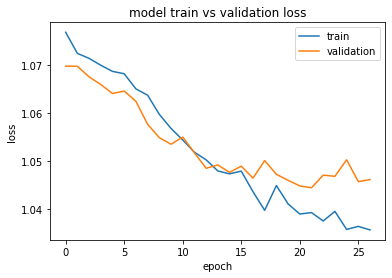

In [58]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model train vs validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [59]:
predictions = model.predict(X_test, batch_size = BATCH_SIZE, verbose = 1)

158/158 [==============================] - 2s 15ms/step


In [0]:
pred = np.zeros((len(y_test),3))
for i in range(len(y_test)):
  count = 0
  for val in predictions[i]:
    if val == max(predictions[i]):
      pred[i][count]=1
    else:
      pred[i][count]=0
    count=count+1


In [61]:
accuracy_score(y_test,pred)

0.44387045499701966

In [0]:
test_labels = np.zeros((len(y_test)))
for i in range(len(y_test)):
  if y_test[i][0] == 1:
    test_labels[i]=0
  elif y_test[i][1] ==1:
    test_labels[i]=1
  elif y_test[i][2] ==1:
    test_labels[i]=-1

pred_labels = np.zeros((len(y_test)))
for i in range(len(y_test)):
  if pred[i][0] == 1:
    pred_labels[i]=0
  elif pred[i][1] ==1:
    pred_labels[i]=1
  elif pred[i][2] ==1:
    pred_labels[i]=-1

In [48]:
y_test.shape

(5033, 3)

In [62]:
df_base = pd.DataFrame(test_labels, columns=['True'])
df_base['all positive'] = 1.0
df_base['all negative'] = -1.0
df_base['all neutral'] = 0.0
df_base['predicted']= pred_labels
df_base=df_base.reset_index(drop=True)
df_base
Acc_1=accuracy_score(df_base['True'],df_base['all positive'])
Acc_2=accuracy_score(df_base['True'],df_base['all negative'])
Acc_3=accuracy_score(df_base['True'],df_base['all neutral'])
Acc_4=accuracy_score(df_base['True'],df_base['predicted'])
print("Accuracies: ", Acc_1, Acc_2 , Acc_3, Acc_4)

Accuracies:  0.3337969401947149 0.2422014702960461 0.424001589509239 0.44625471885555335
